In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data. Visadataset.csv file has 12 cols

path=r"C:\Users\User\OneDrive\Desktop\Omkar sir\DATA files\Visadataset.csv"

In [5]:
visa_df=pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Omkar sir\DATA files\Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**Boxplot**
- Box plot is used **to identify the outliers**



**Outlier** is an observation having huge postive value or huge negative value

Q1 = 25p , Q2=50p and Q3=75p                              # p is percentile 

**IQR = Inter quartile range= Q3-Q1** 

**Outlier= Q1-1.5 * IQR and Q3+ 1.5 * IQR**

In [ ]:
Q1-1.5IQR Q1 median Q3 Q3+1.5IQR
|-----:-----|
o |--------| : |--------| o o
|-----:-----|
flier <-----------> fliers

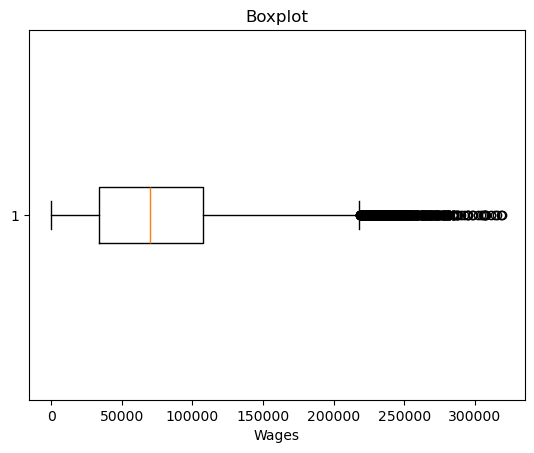

In [9]:
# Read the prevailing wage data and plot the box plot for prevailing_wage column
# use plt from matplotlib pkg
# use methods- boxplot(), title(), xlabel(), show()

wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('Wages')
plt.show()

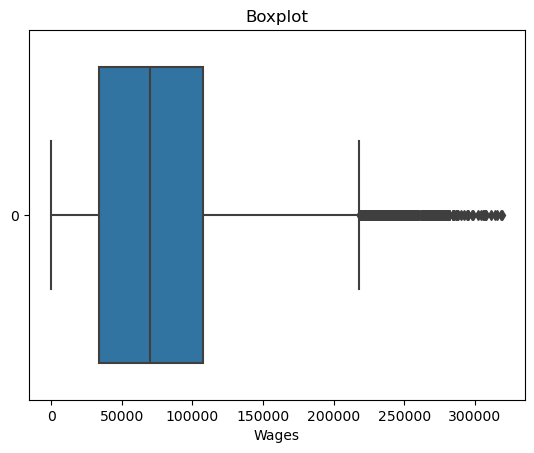

In [44]:
# using sns and plt for vertical orientation of boxplot using orient='h' for prevailing_wage column

wage_data=visa_df['prevailing_wage']

sns.boxplot(wage_data,orient='h')                                  # orient='v' give opposite representaion of box plot

plt.title('Boxplot')

plt.xlabel('Wages')

plt.show()


**Plot the histogram and box plot side by side :**

Text(0.5, 0, 'Histogram')

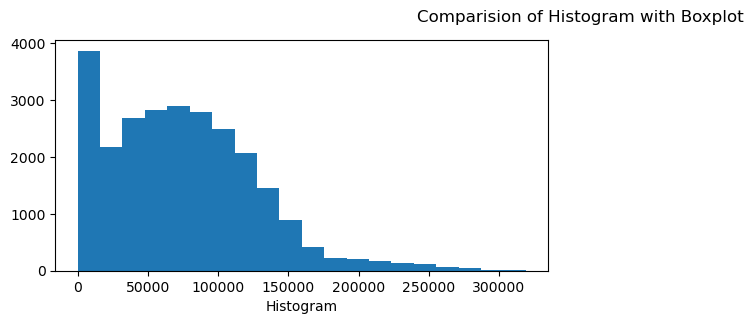

In [56]:
# Plot the histogram and box plot side by side for prevailing_wage column:
# using plt pkg 
# methods used - figure(), suptitle(), subplot(),hist(),xlabel(), boxplot()


wage_data=visa_df['prevailing_wage']                            # extract wage data from visadf dataframe 

plt.figure(figsize=(14,3))                                      # height and width of figure


plt.suptitle('Comparision of Histogram with Boxplot')          # super title in plt to add title to more than one figure                 

plt.subplot(1,2,1)                                             
# The subplot() function takes three arguments that describes the layout of the figure.
# The layout is organized in rows and columns, which are represented by the first and second argument.
# The third argument represents the index of the current plot

# to plot the histogram: 
plt.hist(wage_data,bins=20)                                                                   

plt.xlabel('Histogram')                                           # is printed below histogram




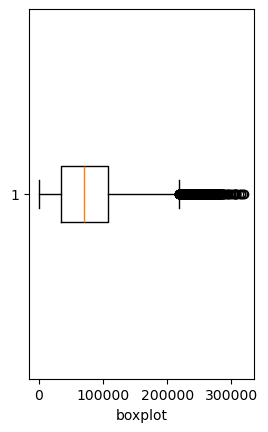

In [58]:
# to plot the boxplot for prevailing_wage column:

plt.subplot(1,2,2)

plt.boxplot(wage_data,vert=False)

plt.xlabel('boxplot')                                      # is printed below boplot

plt.show()

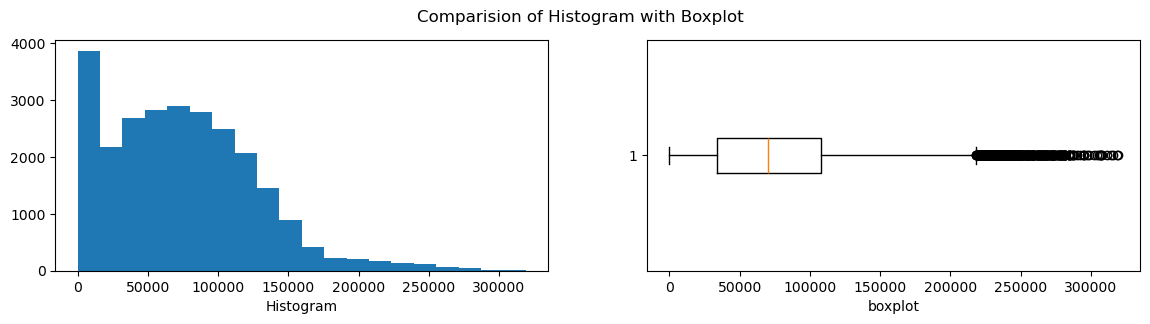

In [61]:
# Plot the histogram and box plot side by side for prevailing_wage column:

wage_data=visa_df['prevailing_wage'] 

plt.figure(figsize=(14,3))

plt.suptitle('Comparision of Histogram with Boxplot')

plt.subplot(1,2,1) 

plt.hist(wage_data,bins=20)

plt.xlabel('Histogram')


# to plot the boxplot:

plt.subplot(1,2,2)

plt.boxplot(wage_data,vert=False)

plt.xlabel('boxplot')

plt.show()

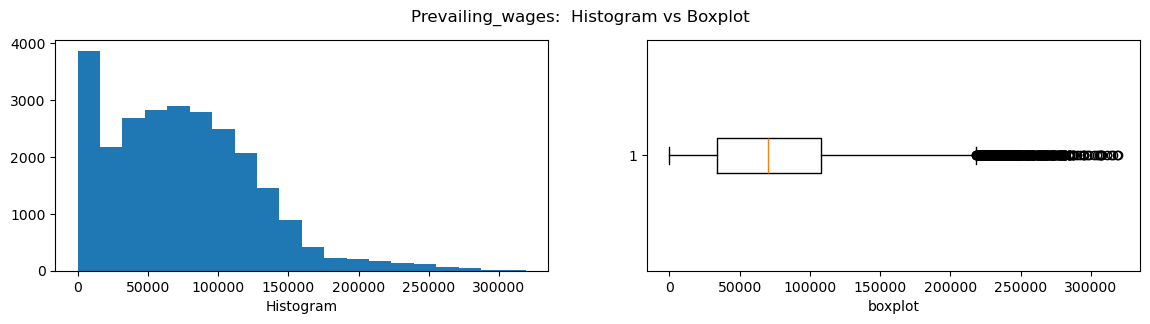

In [111]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Prevailing_wages:  Histogram vs Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**STEPS TO Finding the outliers:**
We already know that outliers are available at : less than Q1-1.5IQR and  more than Q3+1.5IQR

**Step-1:**
Calculate Q1 = 25p
Calculate Q2= 50p
Calculate Q3= 75p

**Step-2:**
Calculate IQR= Q3-Q1

**Step-3:**
Calculate LB= Q1-1.5 * IQR
Calculate UB=Q3+1.5 * IQR

**Step-4:**
- Con1 :  wage_data < LB
- Con2 :  wage_data > UB
- Con3 : con1 or/and con2 (use bitwise operator to combine con1 and 2)

**Step-5:** Data [con3]

In [21]:
# Finding the outliers for prevailing_wage column:

wage_data=visa_df['prevailing_wage']                      # finding outliers for prevailing_wage column

# step-1:

q1=np.percentile(wage_data,25)

q2=np.percentile(wage_data,50)

q3=np.percentile(wage_data,75)

# Step-2:

IQR= q3-q1

# Step-3:

lb= q1-1.5*IQR

ub=q3+1.5*IQR

#Step-4:

con1=wage_data<lb # T F

con2=wage_data>ub # T F

con3=con1|con2

# Bitwise operators used to compare

# Bits data === 0 and 1 == True false

#Step-3:

outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [89]:
# Finding the outliers for prevailing_wage column:

wage_data=visa_df['prevailing_wage']                      # finding outliers for prevailing_wage column

# step-1:

q1=np.percentile(wage_data,25)
print('the 25 percentile wage is:',q1)
print('\n')

q2=np.percentile(wage_data,50)
print('the 50 percentile wage is:',q2)
print('\n')

q3=np.percentile(wage_data,75)
print('the 75 percentile wage is:',q3)
print('\n')

# Step-2:

IQR= q3-q1
print('the the number of peoples prevailing_wage falling in IQR range is:',IQR)     # is the number of people's prevailing_wage falling in IQR range 
print('\n')

# Step-3:

lb= q1-1.5*IQR
print('the lower bound value is:',lb)                   # out of range in this case, we are getting minus value
print('\n')


ub=q3+1.5*IQR
print('the upper bound value is:',ub)
print('\n')

#Step-4:

con1=wage_data<lb                                       # T F

con2=wage_data>ub                                       # T F

con3=con1|con2

# Bitwise operators used to compare

# Bits data === 0 and 1 == True false

#Step-3:

outliers_data=wage_data[con3] 
outliers_data                                           # series output: ascending order- lowest to highest wage
# only > UB values are available since data of < LB is not available in the dataframe 

the 25 percentile wage is: 34015.479999999996


the 50 percentile wage is: 70308.20999999999


the 75 percentile wage is: 107735.51250000001


the the number of peoples prevailing_wage falling in IQR range is: 73720.03250000002


the lower bound value is: -76564.56875000002


the upper bound value is: 218315.56125000003




14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [23]:
outliers_df=visa_df[con3]
outliers_df                             # dataframe output : rows, cols... lowest to highest

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [93]:
# to get non_outliers_data : USE & OPERATOR ON CON1 AND 2

wage_data=visa_df['prevailing_wage']

# step-1
q1=np.percentile(wage_data,25)
q2=np.percentile(wage_data,50)
q3=np.percentile(wage_data,75)

# Step-2:

IQR= q3-q1

# Step-3:

lb= q1-1.5*IQR
print('the lower bound value is:',lb)                   # out of range in this case, we are getting minus value
print('\n')

ub=q3+1.5*IQR
print('the upper bound value is:',ub)                   # out of range in this case, we are getting minus value
print('\n')
#Step-4:

con1=wage_data>lb # T F
con2=wage_data<ub # T F
con3=con1&con2                                   # & operator

# Bitwise operators used to compare
# Bits data === 0 and 1 == True false

#Step-3:
#np.logical_and(Con1, Con2)

non_outliers_df=visa_df[con3]
non_outliers_df                                       # (total data)-(outliers data)

the lower bound value is: -76564.56875000002


the upper bound value is: 218315.56125000003




,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
we have two dataframe
Visa_df: Total data 25480
Outliers=427

So, non_outliers_df= 25480-427= 25043
non_outliers_df= After removing outliers 25053

first plot nonoutliers data prevaling_wage histogram and boxplot

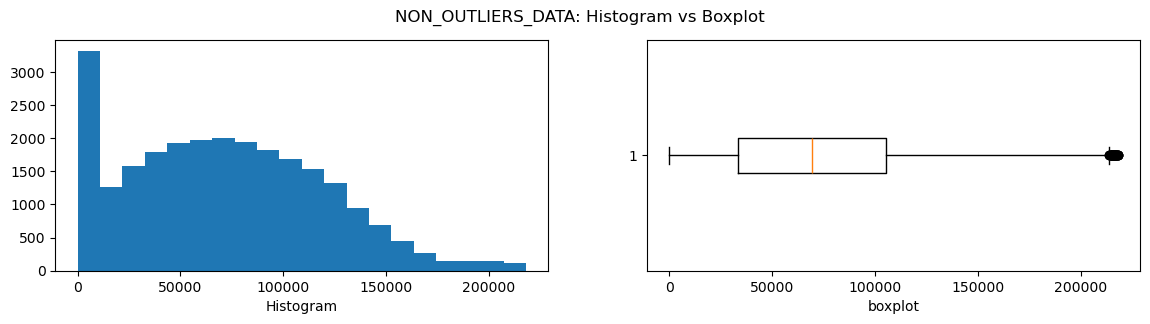

In [113]:
# non-outliers data for prevaling_wage column : histogram and boxplot USING plt pkg
# methods used are : figure(),suptitle(), subplot(),xlabel(), show()

wage_data_non_outliers=non_outliers_df['prevailing_wage']  
 # to read a dataframe column values, give it to a variable and use that variabale in the rest of the code

plt.figure(figsize=(14,3))

plt.suptitle('NON_OUTLIERS_DATA: Histogram vs Boxplot')

plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)

plt.xlabel('Histogram')

plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)

plt.xlabel('boxplot')

plt.show()

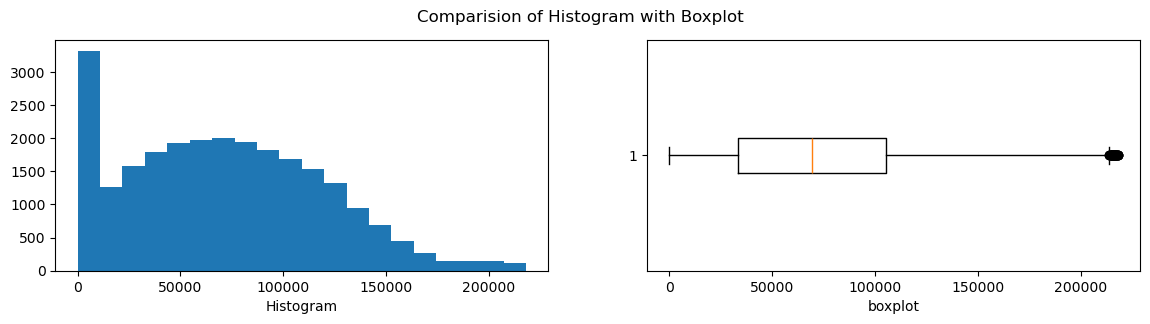

In [125]:
# non-outliers data for prevaling_wage column : histogram and boxplot

wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

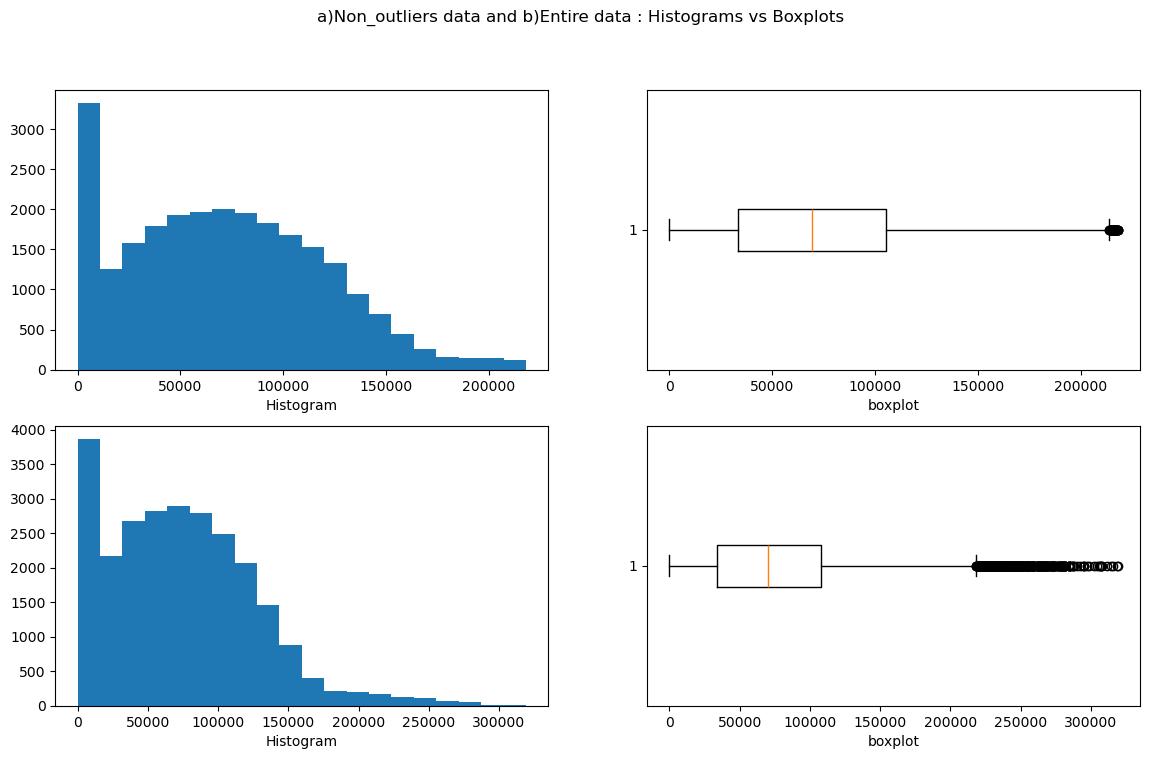

In [117]:
# Comparision of Non_outliers_data with entire data for prevailing_wage column

################### data #######################################

wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']

################# Non outliers######################################

plt.figure(figsize=(14,8))
plt.suptitle('a)Non_outliers data and b)Entire data : Histograms vs Boxplots')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')

###################### Entire data ################################

plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()


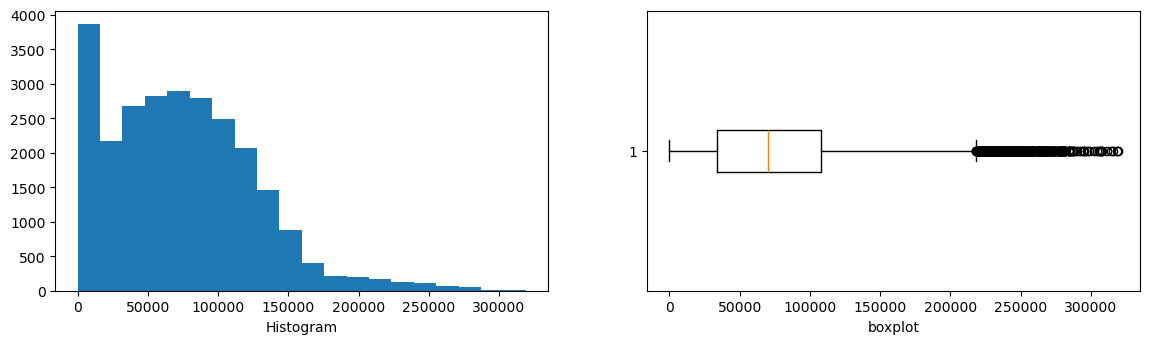

Text(0.5, 0, 'boxplot')

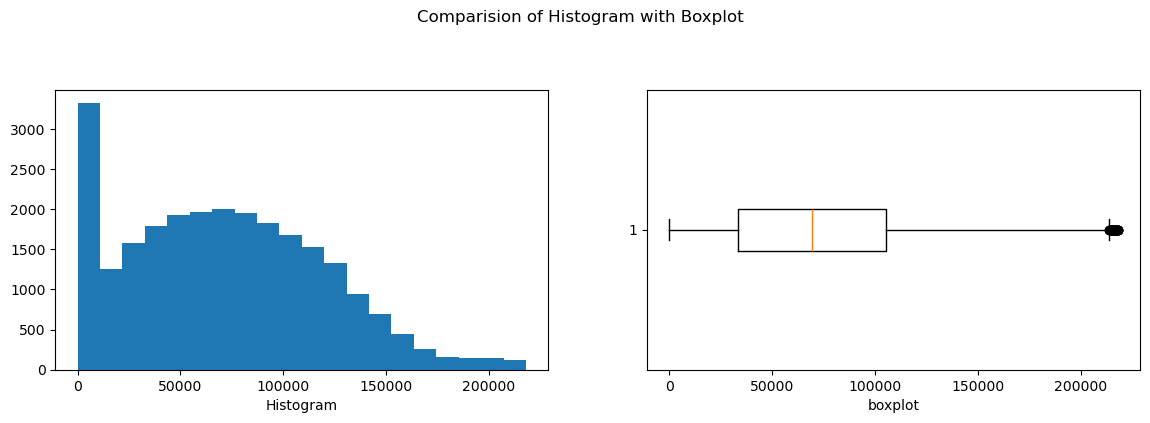

In [137]:
################### data #######################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']


###################### Entire data ################################

plt.figure(figsize=(14,8))

plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()


################# Non outliers######################################

plt.figure(figsize=(14,8))

plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')


In [ ]:
# Fill the outliers of wage data with wage median
# 427 outliers
# 427 should replace with meadin value
# again draw the plots

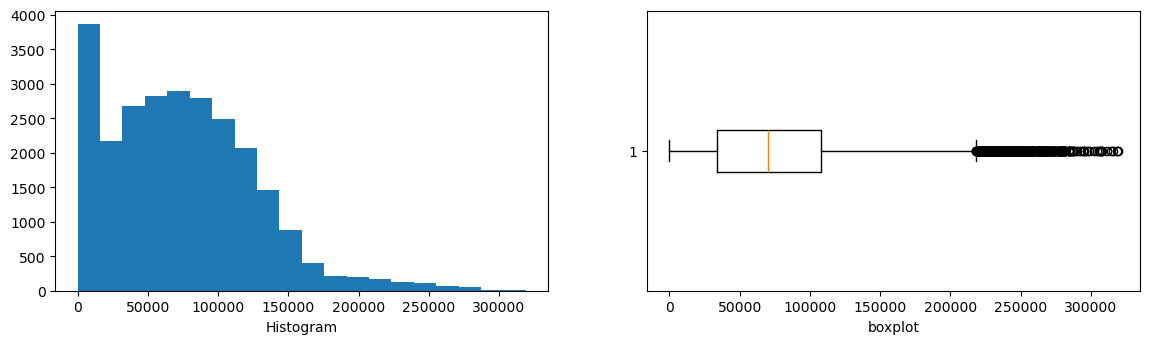

Text(0.5, 0, 'boxplot')

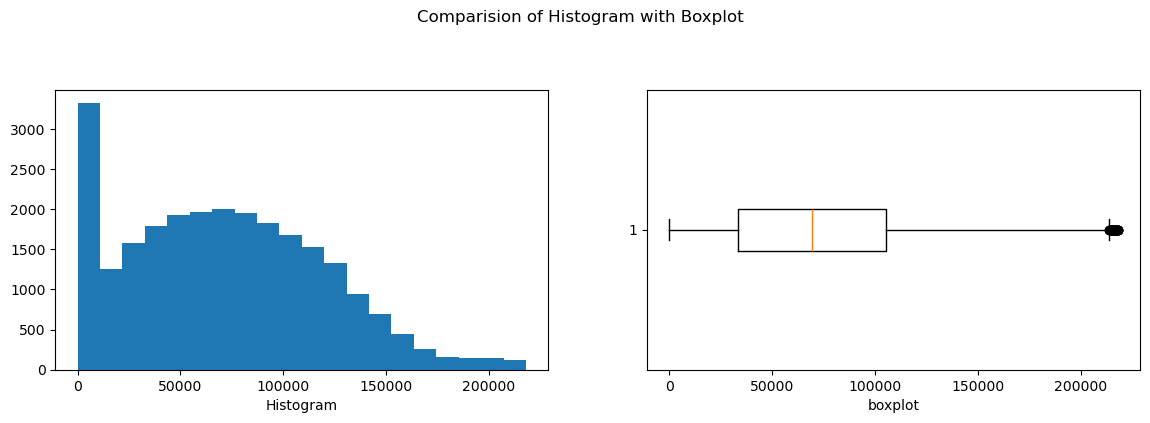

In [121]:
################### data #######################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']

###################### Entire data ################################

plt.figure(figsize=(14,8))
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')

plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()


################# Non outliers######################################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')

plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
